<a href="https://colab.research.google.com/github/harabou/DSAIcourse2025/blob/main/%2302/%2301_NCD_stat_ncd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #01 NCD course biostat

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. Pattern１: Drive mount


In [2]:
#Importing from Google drive
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/20230224_biostat/darwin2.csv') #darwin2.csv

# Check (row, column)
df.shape

# First 5rows are displayed
df.head()


,A,B
0,23.500,17.375
1,12.000,20.375
2,21.000,20.000
3,22.000,20.000
4,19.125,18.375


#2. Pattern2: Drive mount

In [3]:
#Importing from Github
import pandas as pd
fpath = 'https://raw.githubusercontent.com/harabou/DS-AI_course/main/%2301/Iris.csv'#iris.csv

#The first row (specified as row 0 in python) is the heading. Since errors often occur due to the inclusion of Japanese, read in [Shift-jis].
df = pd.read_csv(fpath,header=0, encoding='shift-jis')

df.head()


,gaku_l,gaku_w,kaben_l,kaben_w,group
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#2 Graph

In [4]:
#Loading various packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#Plotting using 「matplotlib」
plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})

#Basic settings for display
%matplotlib inline


##Fisher's Iris data

In [5]:
#Importing from Github
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fpath = 'https://raw.githubusercontent.com/harabou/DS-AI_course/main/%2301/Iris.csv'

df = pd.read_csv(fpath,header=0)

df.head()

,gaku_l,gaku_w,kaben_l,kaben_w,group
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


###1)Histgram

In [6]:
x = np.random.normal(size = 1000)
fpath = 'https://raw.githubusercontent.com/harabou/DS-AI_course/main/%2301/Iris.csv'


df = pd.read_csv(fpath,header=0, encoding='shift-jis')

#Plotting using 「matplotlib」
plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})

%matplotlib inline



<Axes: xlabel='gaku_l', ylabel='Count'>

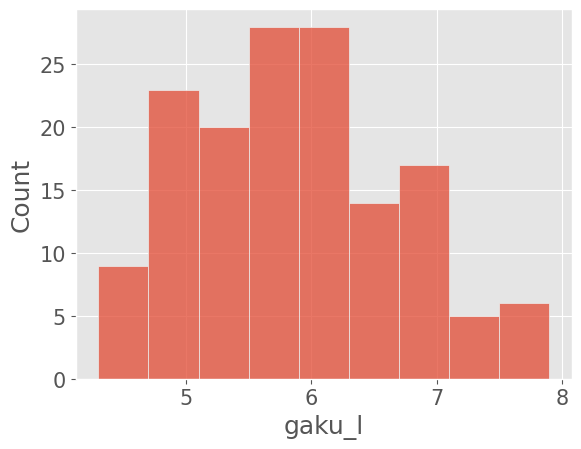

In [7]:
x = np.random.normal(size = 1000)
df = pd.read_csv(fpath,header=0, encoding='shift-jis')

# Graphs using seaborn(sns.)
sns.histplot(df.gaku_l)

###2)Box plot

<Axes: >

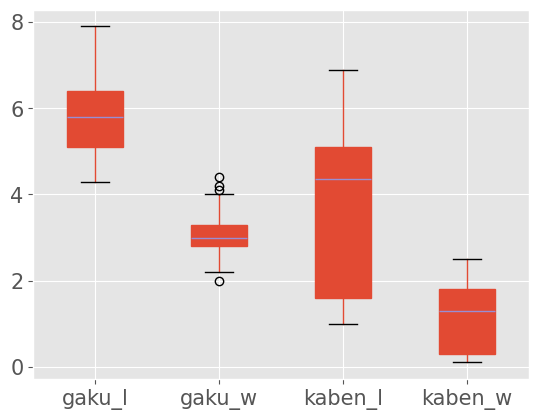

In [8]:
#Plotting using 「matplotlib」
df.boxplot(patch_artist = True)

<Axes: >

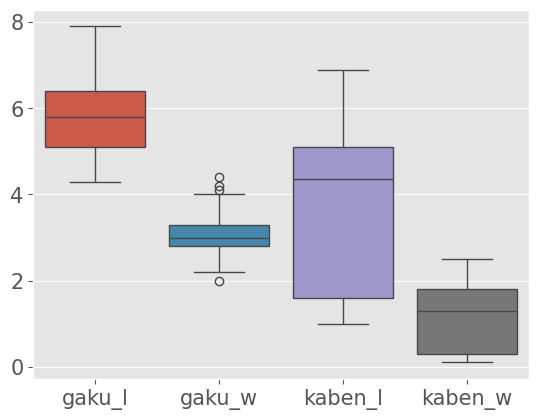

In [9]:
# Graphs using seaborn(sns.)
sns.boxplot(data=df)

特定の列を選択し、その列の中でのグループ分けを基準にして箱ひげ図を作成する。
Select a specific column and create a box-and-whisker plot based on groupings within that column.

byで列を指定すると、そのグループ分けごとにグラフを作成する。
If you specify a column with by, a graph is created for each of its groupings.

array([[<Axes: title={'center': 'gaku_l'}, xlabel='[group]'>,
        <Axes: title={'center': 'gaku_w'}, xlabel='[group]'>],
       [<Axes: title={'center': 'kaben_l'}, xlabel='[group]'>,
        <Axes: title={'center': 'kaben_w'}, xlabel='[group]'>]],
      dtype=object)

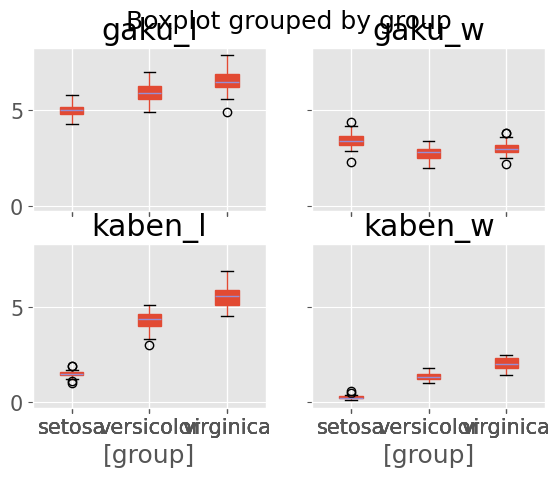

In [10]:
df.boxplot(by='group', patch_artist = True)

各x軸ごとの分類でさらに要素で分類する場合、元データをlongデータセットに変換したうえでseabornを活用する。

To further categorise by element with a classification for each x-axis, convert the original data into a long data set and utilise seaborn.

In [11]:
w = pd.melt(df, id_vars = ["group"])
display(w.head())

,group,variable,value
0,setosa,gaku_l,5.1
1,setosa,gaku_l,4.9
2,setosa,gaku_l,4.7
3,setosa,gaku_l,4.6
4,setosa,gaku_l,5.0


<Axes: xlabel='variable', ylabel='value'>

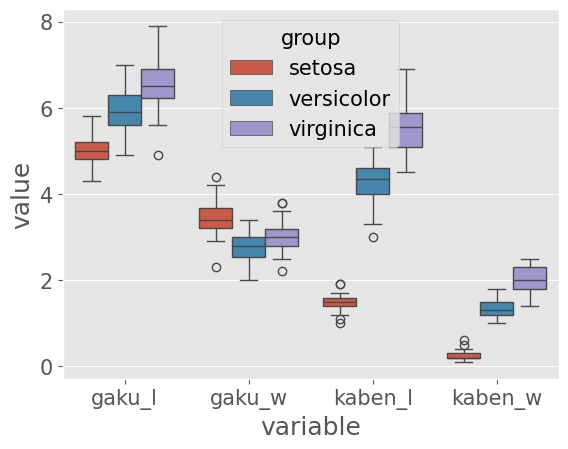

In [12]:
sns.boxplot(x = "variable", y = "value", data = w, hue = "group")


## Health2 data

###3)QQ plot

In [16]:
#「Health2」data
fpath = 'https://raw.githubusercontent.com/harabou/DS-AI_course/refs/heads/main/%2301/health2.csv'

df = pd.read_csv(fpath,header=0)

df.head()

,sex,age,sbp,dbp,salt,id,sbp_c
0,F,64,137,86,13.4,1,3.0
1,F,55,97,66,8.9,2,1.0
2,F,52,151,93,12.7,3,5.0
3,F,63,105,75,10.4,4,1.0
4,F,66,139,71,6.9,5,3.0


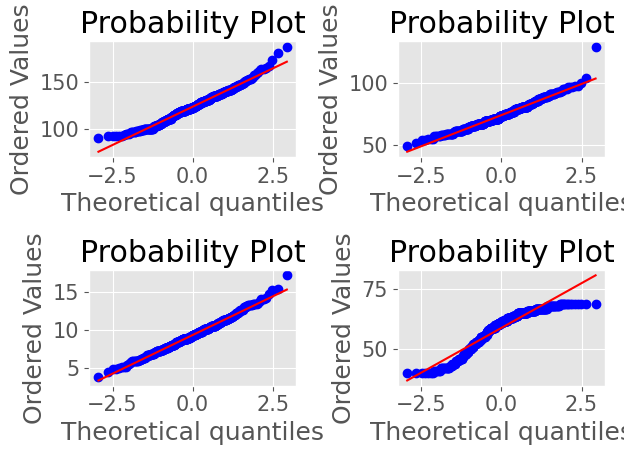

In [18]:
#Loading various packages. Add‘scipy’package.

import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt

sbp = df['sbp']
dbp = df['dbp']
salt = df['salt']
age = df['age']

#Q-Q plot
fig, ax = plt.subplots(2, 2)
stats.probplot(sbp, plot=ax[0, 0])
stats.probplot(dbp, plot=ax[0, 1])
stats.probplot(salt, plot=ax[1, 0])
stats.probplot(age, plot=ax[1, 1])
plt.tight_layout()
plt.show()

###4)Correlation

Pearson

In [19]:
import pandas as pd
df_subset = pd.concat([df['sbp'],df['salt'],df['dbp']], axis=1)

#Pearson
corr = df_subset.corr()
corr

,sbp,salt,dbp
sbp,1.000000,0.177644,0.718942
salt,0.177644,1.000000,0.153706
dbp,0.718942,0.153706,1.000000


Spearman

In [20]:
#Spearman
from scipy.stats import spearmanr
correlation, pvalue = spearmanr(df.sbp, df.dbp)
print(correlation)


0.719316718120455


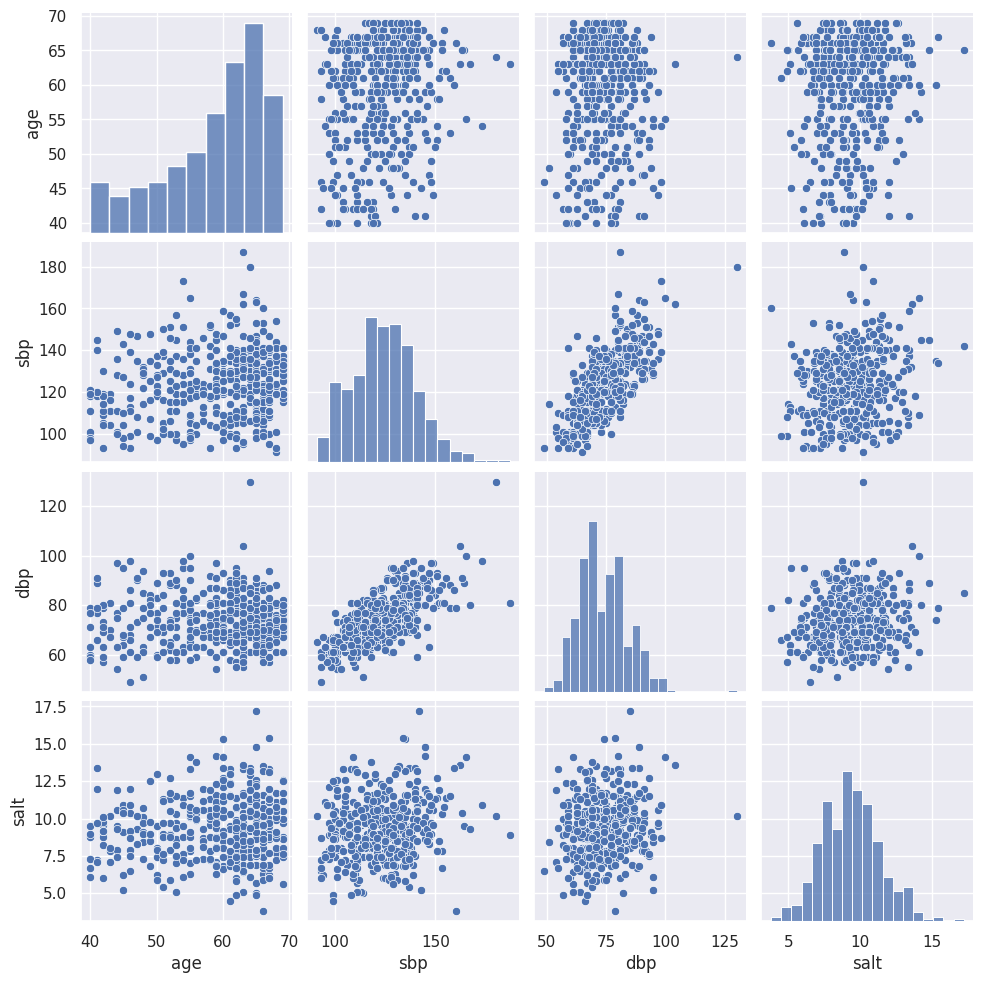

In [21]:
#Loading various packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

fpath = 'https://raw.githubusercontent.com/harabou/DS-AI_course/main/%2301/health3.csv'


df2 = pd.read_csv(fpath,header=0, encoding='shift-jis')

#Plotting using seaborn
pg=sns.pairplot(df2)
plt.show(pg)

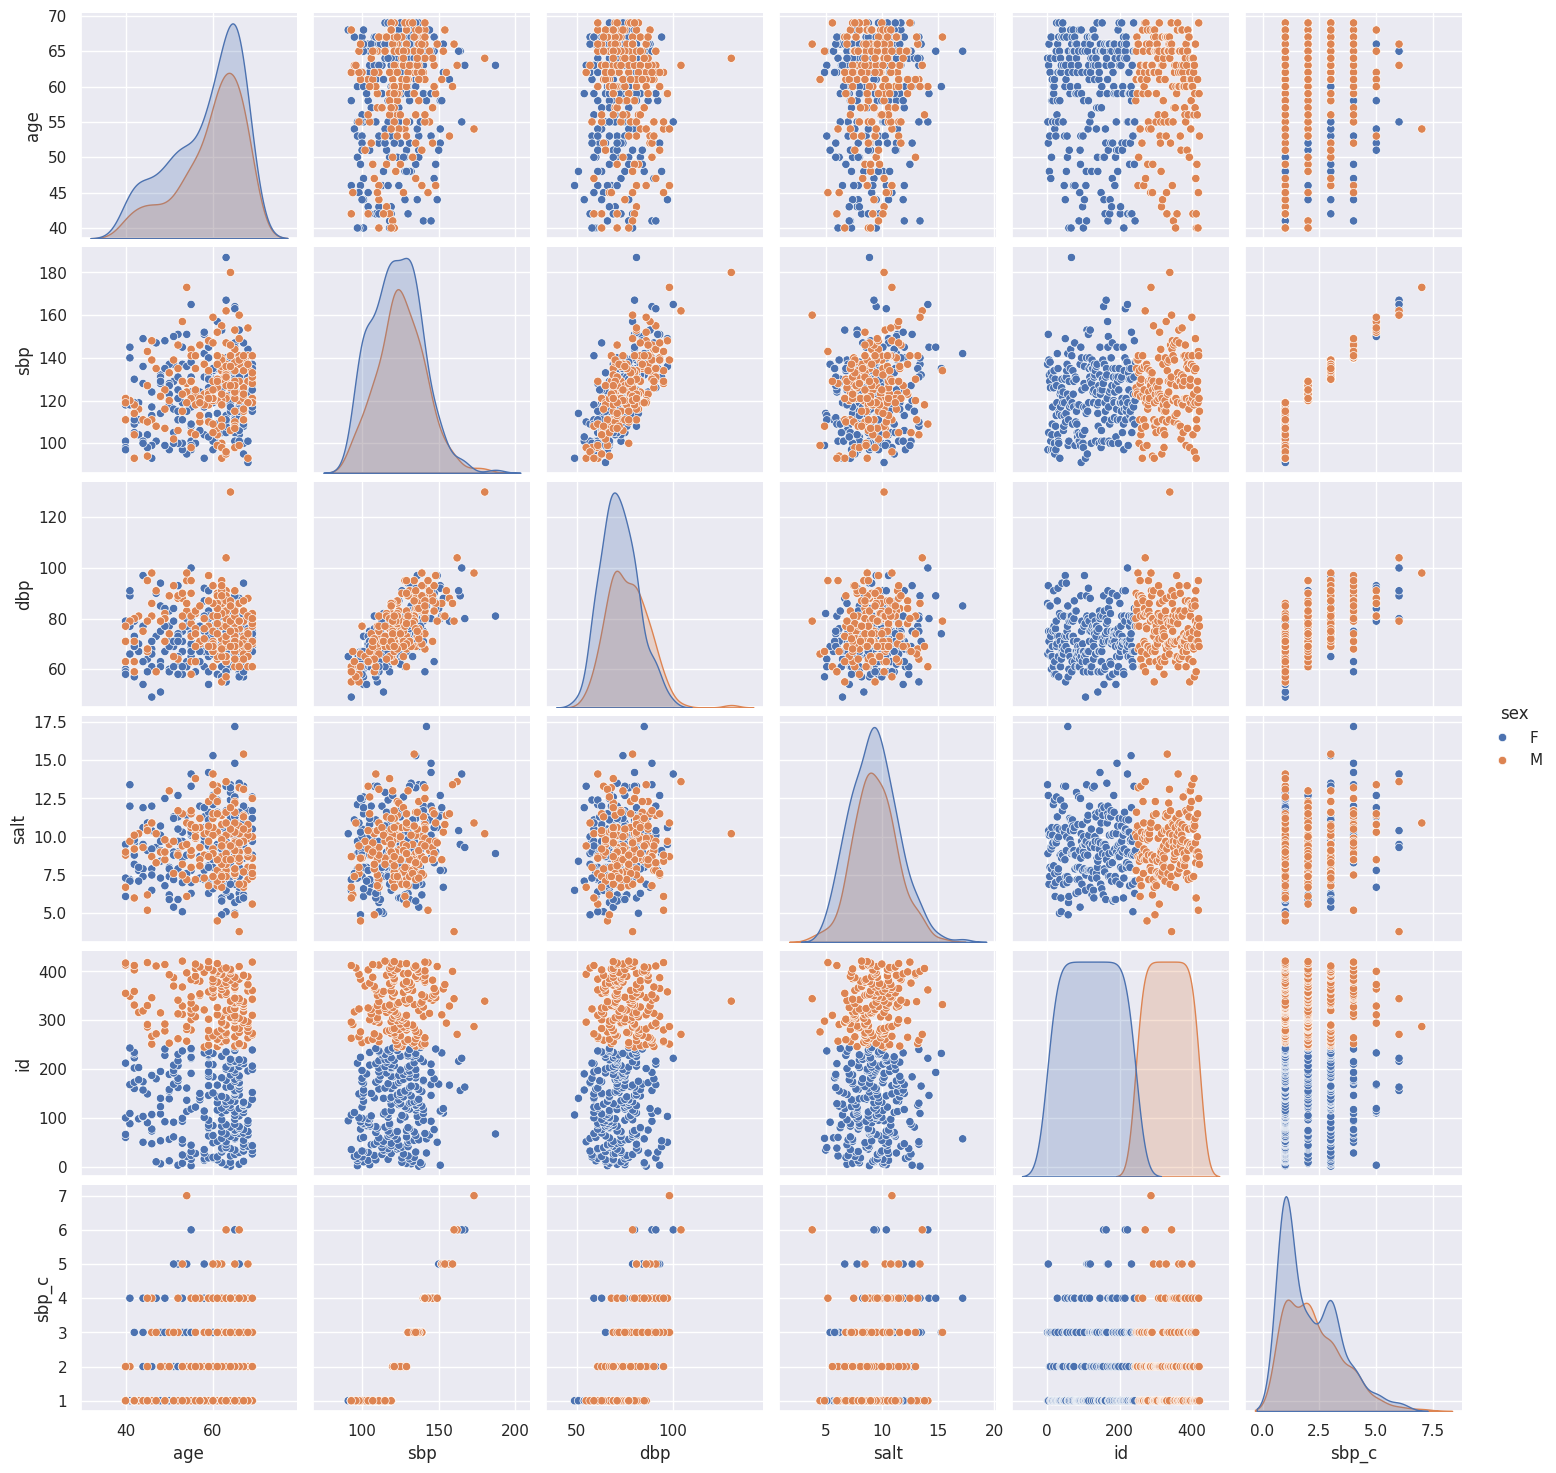

0.7418579997069875
0.6817182054968194


In [22]:
pg2=sns.pairplot(df,hue='sex')
plt.show(pg2)

SBP_F = df[df["sex"]=="F"]["sbp"]
SBP_M = df[df["sex"]=="M"]["sbp"]
DBP_F = df[df["sex"]=="F"]["dbp"]
DBP_M = df[df["sex"]=="M"]["dbp"]

from scipy.stats import spearmanr
correlation, pvalue = spearmanr(SBP_F, DBP_F)
print(correlation)

from scipy.stats import spearmanr
correlation, pvalue = spearmanr(SBP_M, DBP_M)
print(correlation)

#3.Via. Web data
（例）　ネット上のデータ 国勢調査：年齢（５歳階級），男女別人口－全国（大正９年～平成27年）”e-statデータ"**太字**

(e.g.) Data from the internet Census: population by age (5-year age groups), sex - national (1920 - 2015) ‘e-stat data’ bold

In [ ]:
import pandas as pd
fpath = 'https://www.e-stat.go.jp/stat-search/file-download?statInfId=000031524030&fileKind=1'

df = pd.read_csv(fpath,header=0, encoding='shift-jis')

df.head()

,元号,和暦（年）,西暦（年）,年齢5歳階級,人口（総数）,人口（男）,人口（女）
0,大正,9.0,1920.0,総数,55963053.0,28044185.0,27918868.0
1,大正,9.0,1920.0,0〜4歳,7457715.0,3752627.0,3705088.0
2,大正,9.0,1920.0,5〜9歳,6856920.0,3467156.0,3389764.0
3,大正,9.0,1920.0,10〜14歳,6101567.0,3089225.0,3012342.0
4,大正,9.0,1920.0,15〜19歳,5419057.0,2749022.0,2670035.0
